# Практическая работа №1: Основы анализа и моделирования социальных сетей

Выполнил студент гр. 0383 Сергевнин Дмитрий. Вариант №17

## Цель работы
Овладеть навыками работы с математическими пакетами для моделирования, визуализации и анализа социальных сетей..

## Основные теоретические положения
**Социоматрица** -- матрица $X$ размерности $g \times g$, описывающая смежные узлы в сети.

**Размер сети** -- количество акторов сети.

**Плотность сети** -- доля имеющихся связей по отношению к макисмально возможному количеству связей.

Для ориентированных сетей: $\Delta = \displaystyle{\frac{L}{A_g^2}}$

Для неориентированных сетей: $\Delta = \displaystyle{\frac{L}{C^2_g}}$

**Подгруппа** - любое подмножество акторов и все связи между ними.

**Группа** - совокупность всех акторов, связи между которыми должны быть изучены.

**Компонента** -- подгруппа, в котором все акторы связаны друг с другом прямо или косвенно.

**Диаметр полной сети** -- наибольшая длина любого из кратчайших путей между всеми парами узлов.

**Коэффициент кластеризации** --  мера степени, в которой узлы графа стремятся сгруппироваться вместе.

**Степень узла** -- число рёбер, инцидентных узлу $n_i$.

Средняя степень узлов: $\overline{d} = \displaystyle{\frac{1}{g}} \sum^g_{i = 1} d(n_i)$

Дисперсия степени узлов: $S^2_D = \displaystyle{\frac{1}{g}} \sum^g_{i = 1} \left(d(n_i) - \overline{d}\right)^2$

**Центральность по степени** -- степень каждого актора.

Нормированная центральность по степени: $C'_D (n_i) = \displaystyle{\frac{d(n_i)}{g-1}}$

**Центральность по близости** -- более важными узлами считаются узлы, наиболее близкие к остальным узлам сети.

Нормированная центральность по близости: $C'_C (n_i) = \displaystyle{\frac{g - 1}{\sum^g_{j = 1} d(n_i, n_j)}}$

**Центральность по последовательности** -- характеризует, насколько важную роль данный узел играет на пути "между" парами других узлов сети, в том смысле, что пути между другими узлами должны проходить через данный узел.

Нормированная центральность по посредничеству: $C'_B = \displaystyle{\frac{C_b (n_i)}{C_{g-1}^2}}$

**Центральность по информации** -- обобщение понятия центральности по посредничеству, в котором все пути, между акторами с весами зависят от их длин, учитываются при подсчёте промежуточности.

**Централизация по степени:** $C_D = \displaystyle{\frac{\sum_{i = 1}^g (C'_D (n^*) - C'_D (n_i))}{(g-1)(g-2)}}$

**Централизация по близости**: $C_C = \displaystyle{\frac{\sum_{i = 1}^g (C'_C (n^*) - C'_C (n_i))}{(g-1)(g-2)/(2g - 3)}}$

**Централизация по посредничеству**: $C_B = \displaystyle{\frac{\sum_{i = 1}^g (C'_B (n^*) - C'_B (n_i))}{(g-1)}}$

**Централизация по информации** как дисперсия индексов инф. актора: $S_I^2 = \displaystyle{\frac{1}{g}} \sum^g_{i = 1} \left( C'_I (n_i) - \overline{C_I} \right) ^2$

**Алгоритм Фрюхтермана-Рейнгольда** -- силовой алгоритм укладки графа (т. е. итеративный алгоритм, основанный на уменьшении общей энергии сети, где энергия может быть определена различными способами), в котором вершины определяются как некие тела, оказывающие друг на друга силы притяжения и отталкивания.

**Алгоритм Камада-Кавай** -- силовой алгоритм укладки графа, в котором вершины определяются как тела системы, а рёбра -- как пружины. Пружинная система настраивается таким образом, чтобы минимизация энергии системы соответствовала минимизации разницы между геометрическими и графовыми расстояниями.

**Точка сочленения** -- узел, при удалении которого появялется еще одна компонента.

**Мост** -- ребро, при удалении которого появялется еще одна компонента.

**Престиж** -- мера, характеризующая актора с большим количеством входящих связей.

**Престиж по степени** -- входящая степень каждого узла: $P_D (n_i) = d_I (n_i) = x_{+i}$

Нормированный престиж по степени: $P'_D (n_i) = \displaystyle{\frac{x_{+i}}{g - 1}}$

**Престиж по близости** -- определяет, насколько все акторы близки к заданному по расстоянию до него.

$P_p (n_i) = \displaystyle{\frac{\# I_i / (g-1)}{\sum_{j: n_j \in I_i} \left( d(n_j, n_i) / \# I_i\right)}}$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей вычислить описательные характеристики. Полученные результаты содержательно проинтерпретировать..

## Выполнение работы
Каждый пункт работы (*по возможности*) выполняется с помощью кода.
Рекомендованные языки программирования – R или Python.

In [2]:
# Необходимые библиотеки
if(!require('igraph')) {
        install.packages('igraph')
        library('igraph')
        
    }
if(!require('network')){
        install.packages('network')
        library('network')
}
if(!require('sna')){
        install.packages('sna')
        library('sna')
}
if(!require('intergraph')){
        install.packages('intergraph')
        library('intergraph')
}

In [3]:
# 1) Из файла florentine_business.csv (для нечётных вариантов)
# извлечь социоматрицу с помощью соответствующих функций. Вывести полученную социоматрицу на экран.

florentine_business <- read.table("./florentine_business.csv", header = TRUE, sep=',')
florentine_business

Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


In [4]:
# 2) Преобразовать социоматрицу в список рёбер. Вывести первые 5 элементов списка рёбер.
 edgelist <- as_edgelist(graph.adjacency(as.matrix(florentine_business), mode = "undirected"))
 head(edgelist, 5)

Barbadori,Castellani
Barbadori,Ginori
Barbadori,Medici
Barbadori,Peruzzi
Bischeri,Guadagni


In [5]:
# 3) Присвоить имена столбцам и строкам социоматрицы (имена – первая строка в csv-файле после комментариев).
rownames(florentine_business) <- colnames(florentine_business)
florentine_business

,Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Acciaiuoli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Albizzi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Barbadori,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
Bischeri,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
Castellani,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
Ginori,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
Guadagni,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
Lamberteschi,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
Medici,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1


as.matrix(florentine_business) - таблицу florentine_business преобразовываем в матрицу
mode = "undirected" - направленность ребер (ненаправленный граф)

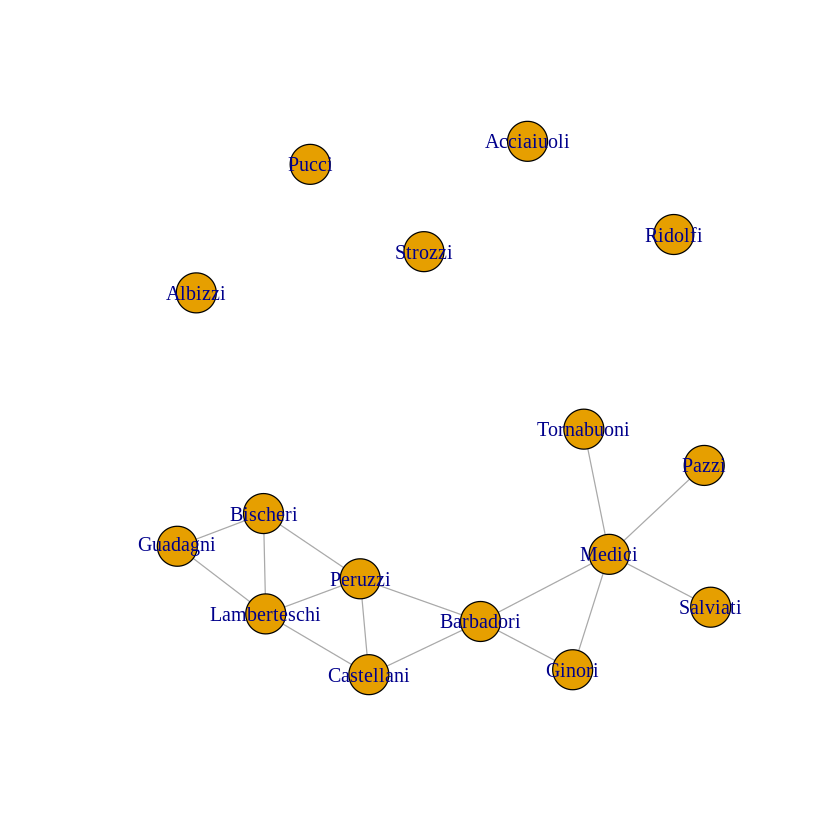

In [26]:
# 4) С помощью соответствующих функций по полученной социоматрице построить ненаправленную сеть.
# Объяснить параметры, передаваемые в функцию.
net <- graph_from_adjacency_matrix(as.matrix(florentine_business), mode = "undirected")
plot(net)

cat("as.matrix(florentine_business) - таблицу florentine_business преобразовываем в матрицу\n")
cat('mode = "undirected" - направленность ребер (ненаправленный граф)')

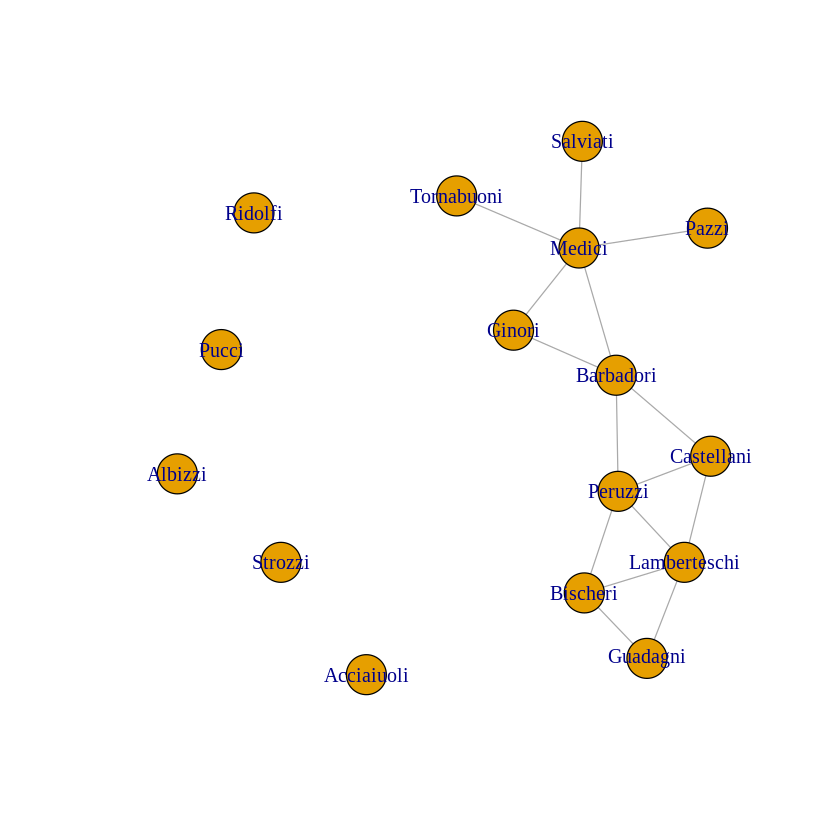

In [27]:
# 5) Отобразить сеть с помощью алгоритмов укладки Фрюхтермана–Рейнгольда и Камада–Каваи. Объяснить, в чём различие между алгоритмами и укладками.
# Различие : укладка Фрюхтермана–Рейнгольда основывается на силах притяжения и отталкивания вершин, а укладка Камада–Каваи основывается 
# на пружинной системе так, что минимизация энергии системы соответствовала минимизации между геометрическим и графовым расстоянием
# Укладка Фрюхтермана–Рейнгольда наиболее подходящий вариант. Вершины гораздо лучше распределены по поверхности. Проще заметить ребра.
# Например связи между Barbadori и Medici не видно при укладке Камада–Каваи.
plot(net, layout=layout_with_fr(net))

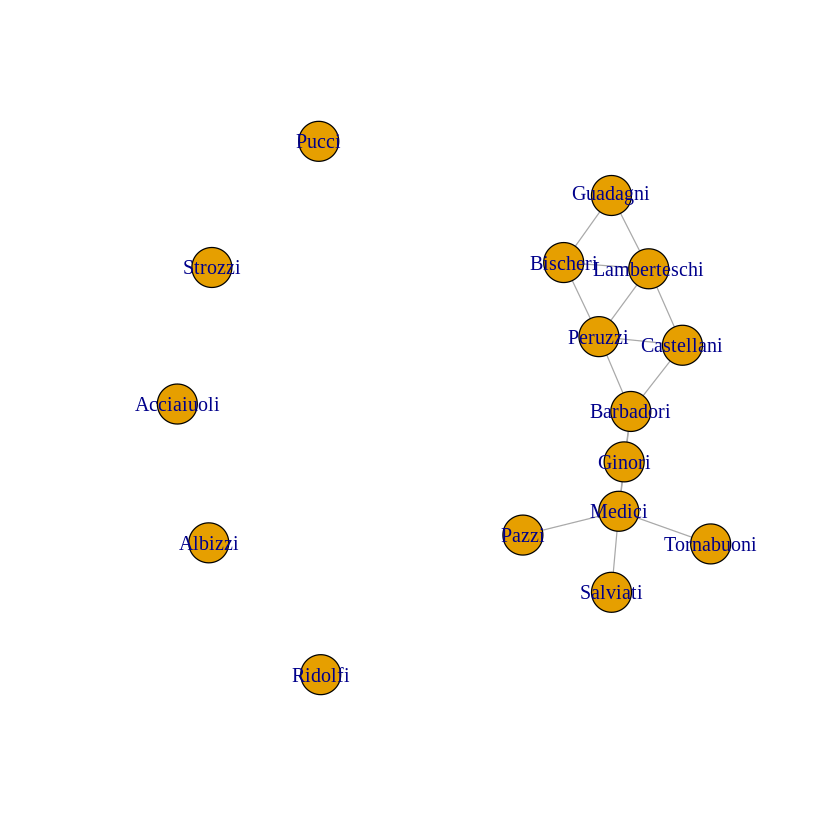

In [28]:
plot(net, layout = layout_with_kk(net))

In [29]:
# 6) Вывести «описательную сводку» сети.
summary(as.network(as.matrix(florentine_business), directed = F, loops = T, matrix.type = "adjacency"))

#sum.network(net)
#str(net)

Network attributes:
  vertices = 16
  directed = FALSE
  hyper = FALSE
  loops = TRUE
  multiple = FALSE
  bipartite = FALSE
 total edges = 15 
   missing edges = 0 
   non-missing edges = 15 
 density = 0.1102941 

Vertex attributes:
  vertex.names:
   character valued attribute
   16 valid vertex names

No edge attributes

Network edgelist matrix:
      [,1] [,2]
 [1,]    5    3
 [2,]    6    3
 [3,]    9    3
 [4,]   11    3
 [5,]    7    4
 [6,]    8    4
 [7,]   11    4
 [8,]    8    5
 [9,]   11    5
[10,]    9    6
[11,]    8    7
[12,]   11    8
[13,]   10    9
[14,]   14    9
[15,]   16    9

In [30]:
# 7) Вычислить «пятичисловую сводку» сети:
#     Вычислить размер сети.
#     Вычислить плотность сети вручную и с помощью соответствующей функции. Сделать выводы.
#     Определить число компонент в сети по графику. Подтвердить свои догадки с помощью соответствующей функции. Сделать выводы.
#     Вычислить диаметр сети. Сделать выводы
#     Вычислить коэффициент кластеризации. Сделать выводы.



cat("Размер сети: ", vcount(net), '\n')
cat("Плотность сети с помощью функции: ", graph.density(net), '\n')
cat("Плотность сети вручную: ", ecount(net)/(factorial(vcount(net))/(factorial(vcount(net) - 2) * factorial(2))), '\n')
cat("Вывод: плотности совпали, следовательно формула работает правильно\n")
cat("Число компонент в сети по графику: ", 6, '\n')
cat("Число компонент в сети с помощью соответствующей функции: ", count_components(net), '\n')
cat("Вывод: из графика следует следующее: число изолированных вершин + компонента = 6, следовательно формула работает правильно\n")
cat("Диаметр сети: ", diameter(net), '\n')
cat("Вывод: можно посчитать наибольшее расстояние между вершинами при минимальном пути. Это расстояние равно 5, следовательно формула работает правильно\n")
cat("Коэффициент кластеризации: ", transitivity(net, type = "undirected"), '\n')
cat("Вывод: Достаточно большой коэффициет закрытых треугольников")

Размер сети:  16 
Плотность сети с помощью функции:  0.125 
Плотность сети вручную:  0.125 
Вывод: плотности совпали, следовательно формула работает правильно
Число компонент в сети по графику:  6 
Число компонент в сети с помощью соответствующей функции:  6 
Вывод: из графика следует следующее: число изолированных вершин + компонента = 6, следовательно формула работает правильно
Диаметр сети:  5 
Вывод: можно посчитать наибольшее расстояние между вершинами при минимальном пути. Это расстояние равно 5, следовательно формула работает правильно
Коэффициент кластеризации:  0.4166667 
Вывод: Достаточно большой коэффициет закрытых треугольников

In [31]:
# 8) Вычислить среднюю степень узлов и дисперсию. Сделать выводы.
# Акторы в сети имеют различное кол-во связей. Дисперсия относительно велика. Так как некоторые вершины изолированы, а другие имеют больше двух связей
cat("Средняя степень узлов:", mean(igraph::degree(net)), '\n')
cat("Дисперсия:", var(igraph::degree(net)), '\n')

Средняя степень узлов: 1.875 
Дисперсия: 3.05 


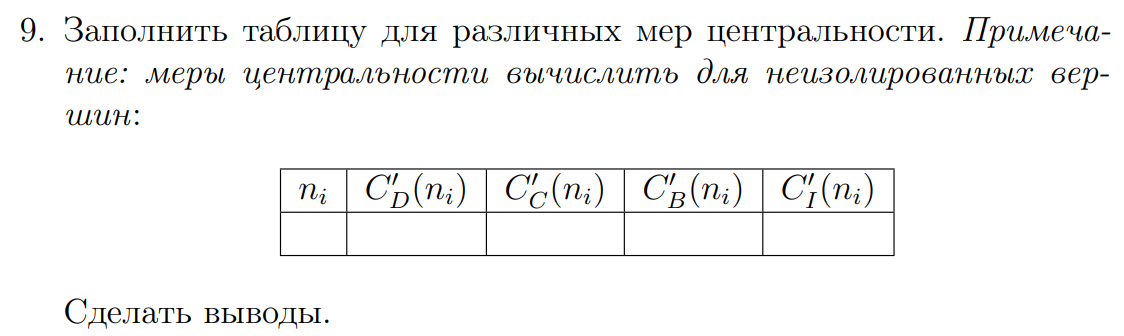

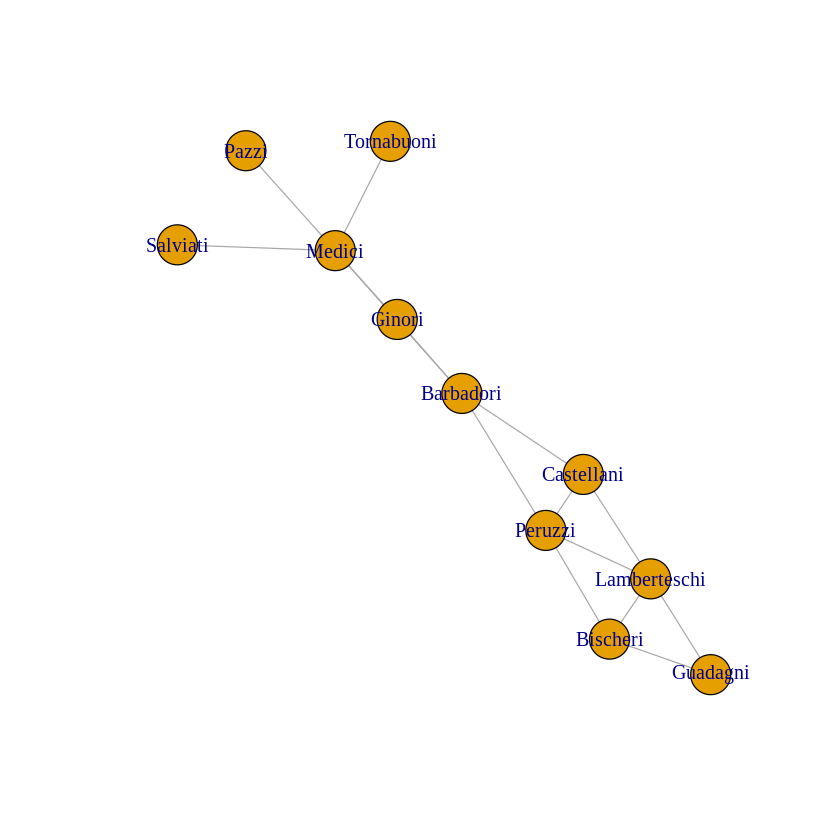

In [32]:
net_without_isolated <- delete_vertices(net, which(igraph::degree(net)==0))
plot(net_without_isolated)

In [35]:
net_without_isolated <- network(edgelist, matrix.type="edgelist", directed = F)
#new_net <- network::delete.vertices(net, isolates(net))
information_cent <- sna::infocent(net_without_isolated, gmode="digraph")
information_cent_norm <- information_cent / sum(information_cent)

In [37]:
net_without_isolated <- delete_vertices(net, which(igraph::degree(net)==0))
centr_degree_res <- centr_degree(net_without_isolated, normalized = TRUE)$res
centr_degree_res_norm <- centr_degree_res / (vcount(net_without_isolated) - 1)

In [38]:
cTable <- data.frame(ni = V(net_without_isolated)$name)

cTable$Cd <- centr_degree_res_norm
cTable$Cc <- igraph::closeness(net_without_isolated, normalized = T)
cTable$Cb <- igraph::betweenness(net_without_isolated, directed = FALSE, normalized = TRUE)
cTable$Ci <- information_cent_norm
cat("Выводы: значения мер различаются друг от друга, поэтому разные меры могут использоваться в разных ситуациях в зависимости от выбранной меры, поэтому.\n
Самым важным актором по мере центральности по степени и информации является актор с именем Medici, а по двум другим - актор с именем Barbadori.",'\n')
cTable

Выводы: значения мер различаются друг от друга, поэтому разные меры могут использоваться в разных ситуациях в зависимости от выбранной меры, поэтому.

Самым важным актором по мере центральности по степени и информации является актор с именем Medici, а по двум другим - актор с именем Barbadori. 


ni,Cd,Cc,Cb,Ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Barbadori,0.4,0.5882353,0.55555556,0.12446815
Bischeri,0.3,0.4000000,0.05555556,0.08898359
Castellani,0.3,0.5000000,0.11111111,0.10457651
Ginori,0.2,0.4545455,0.00000000,0.09531249
Guadagni,0.2,0.3125000,0.00000000,0.07656303
Lamberteschi,0.4,0.4166667,0.13333333,0.09837087
Medici,0.5,0.5263158,0.53333333,0.11089878
Pazzi,0.1,0.3571429,0.00000000,0.06388631
Peruzzi,0.4,0.5263158,0.30000000,0.10916767


In [39]:
# 10) Вычислить значение централизации для каждой меры. Сделать выводы.
network_without_isolated <- network(edgelist, matrix.type="edgelist", directed = F)
centrality_by_info <- sna::infocent(network_without_isolated, gmode='graph', rescale=TRUE) # rescale нормирует
centr_by_info <- sum(sapply(centrality_by_info, function(x) {(x-sum(centrality_by_info))^2})) / length(centrality_by_info)

cat("Централизация по степени: ", centr_degree(net_without_isolated)$centralization, "\n")
cat("Централизация по близости: ", centr_clo(net_without_isolated)$centralization, "\n")
cat("Централизация по посреднечеству: ", centr_betw(net_without_isolated)$centralization, "\n")
cat("Централизация по информации: ", centr_by_info, "\n")
cat("Вывод: вывод аналогичен, сделанному в прошлом задании, однако теперь касательно не одного актора, а всей подгруппы")

Централизация по степени:  0.2272727 
Централизация по близости:  0.3535226 
Централизация по посреднечеству:  0.4422222 
Централизация по информации:  0.8268573 
Вывод: вывод аналогичен, сделанному в прошлом задании, однако теперь касательно не одного актора, а всей подгруппы

Мосты отмечены красным цветом, точки сочленения синим.

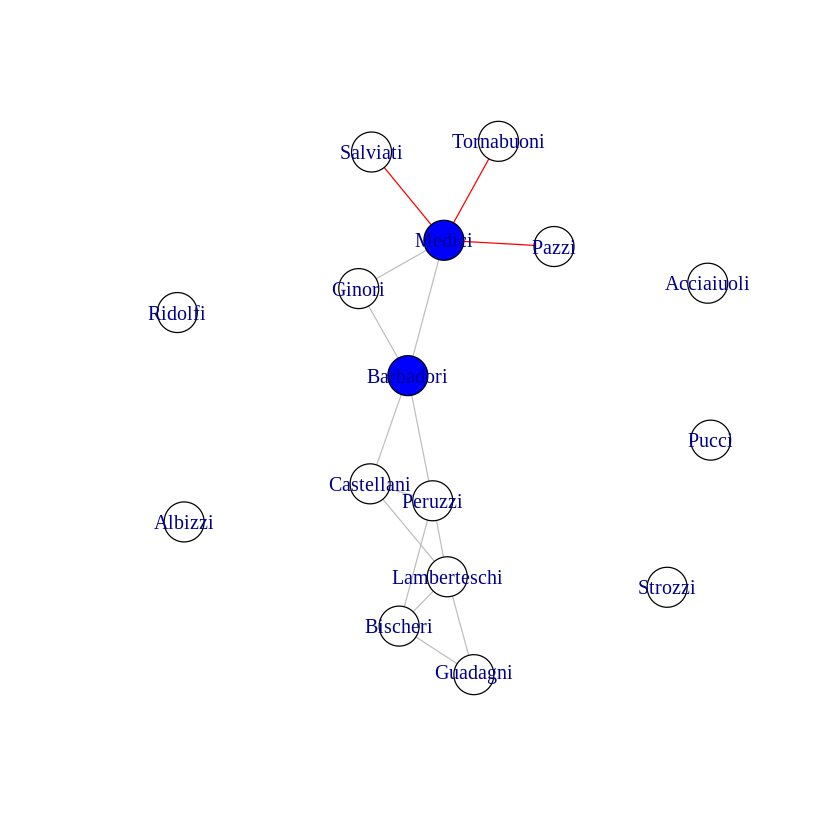

In [40]:
# 11) Выявить точки сочленения и мосты сети. Подтвердить свои догадки с помощью соответствующих функций (если их нет – реализуйте их самостоятельно). 
# Построить график сети, на котором выделены точки сочленения и мосты.
articulation_points <- igraph::articulation_points(net)
graph_bridges <- igraph::bridges(net)

plot(net, 
  vertex.color = ifelse(V(net) %in% articulation_points,'blue','white'),
  edge.color = ifelse(E(net) %in% graph_bridges,'red','gray'), 
)
cat("Мосты отмечены красным цветом, точки сочленения синим.")

In [41]:
# 12) Выполнить пп. 2–8 для направленной сети из файла krackhardt_advice.csv (для нечётных вариантов)
# 12.2) Преобразовать социоматрицу в список рёбер. Вывести первые 5 элементов списка рёбер.
df_krackhardt_advice <- read.csv('krackhardt_advice.csv', comment.char = '#', header=FALSE)
sociomatrix_krackhardt_advice <- as.matrix(df_krackhardt_advice)
edgeslist_krackhardt_advice <- as_edgelist(graph.adjacency(sociomatrix_krackhardt_advice, mode = "directed"))
colnames(edgeslist_krackhardt_advice) <- c('From', 'To')
head(edgeslist_krackhardt_advice, 5)

From,To
V1,V2
V1,V4
V1,V8
V1,V16
V1,V18


In [42]:
# 12.3) Присвоить имена столбцам и строкам социоматрицы (имена – первая строка в csv-файле после комментариев).
rownames(sociomatrix_krackhardt_advice) <- colnames(sociomatrix_krackhardt_advice)
sociomatrix_krackhardt_advice

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
V1,0,1,0,1,0,0,0,1,0,0,⋯,0,0,0,0,1,0,1,0,0,1
V2,0,0,0,0,0,1,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
V3,1,1,0,1,0,1,1,1,1,1,⋯,1,0,1,0,0,1,1,0,1,1
V4,1,1,0,0,0,1,0,1,0,1,⋯,1,0,0,0,1,1,1,0,1,1
V5,1,1,0,0,0,1,1,1,0,1,⋯,0,1,1,0,1,1,1,1,1,1
V6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1
V7,0,1,0,0,0,1,0,0,0,0,⋯,1,0,1,0,0,1,1,0,0,1
V8,0,1,0,1,0,1,1,0,0,1,⋯,0,0,0,0,0,0,1,0,0,1
V9,1,1,0,0,0,1,1,1,0,1,⋯,1,0,1,0,1,1,1,0,0,1
V10,1,1,1,1,1,0,0,1,0,0,⋯,0,1,0,1,1,1,1,1,1,0


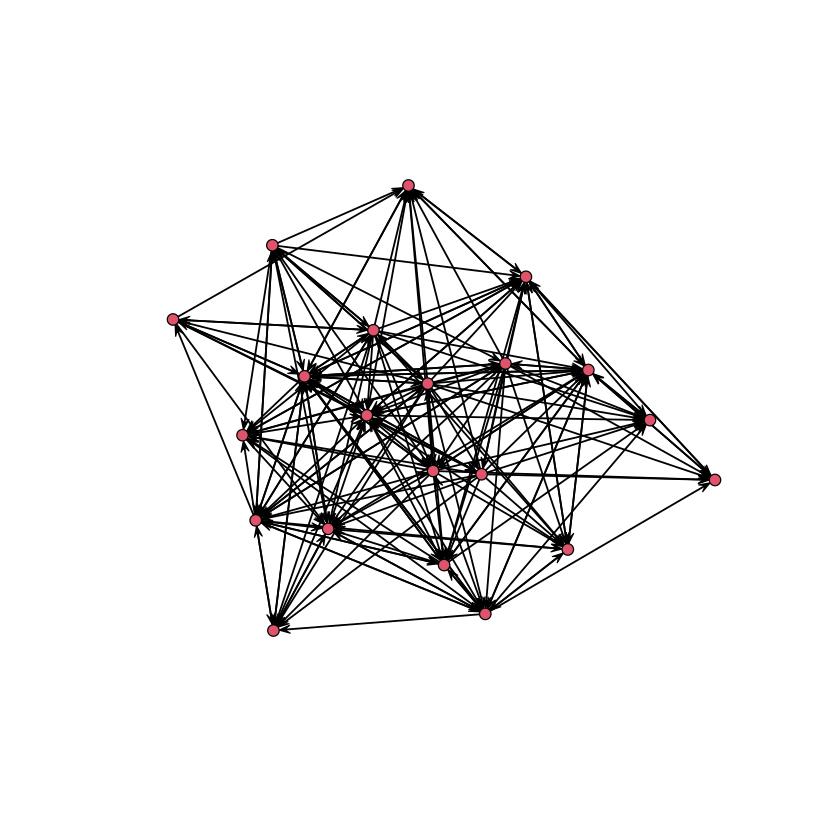

In [43]:
# 12.4) С помощью соответствующих функций по полученной социоматрице построить направленную сеть.
network_krackhardt_advice <- network(sociomatrix_krackhardt_advice, mode = "directed")
plot(network_krackhardt_advice)

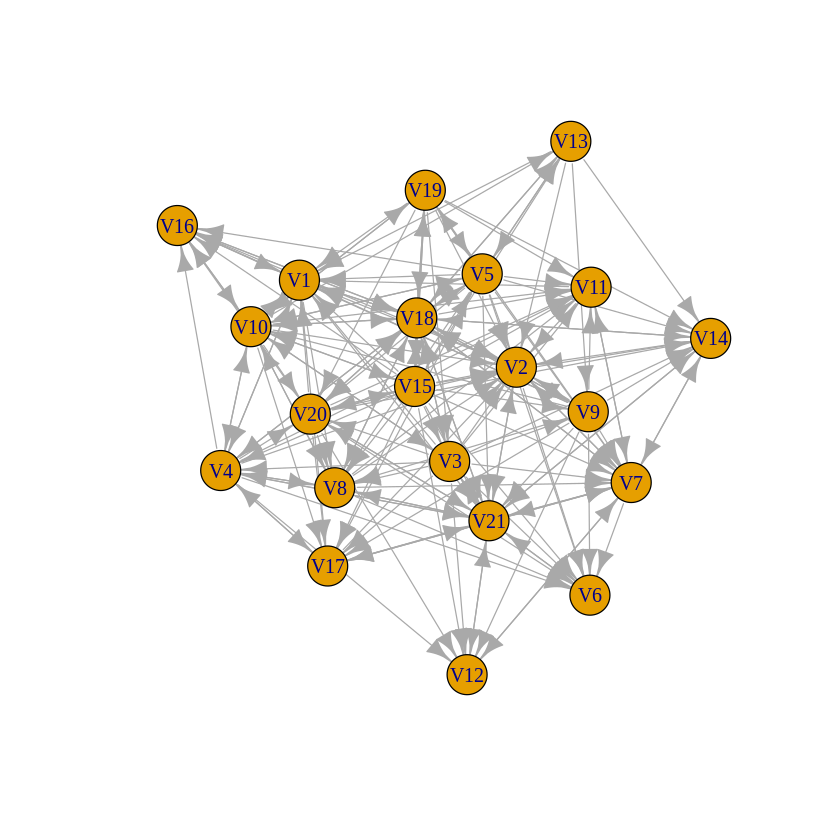

In [44]:
# 12.5) Отобразить сеть с помощью алгоритмов укладки Фрюхтермана–Рейнгольда и Камада–Каваи
# Алгоритм Камада-Каваи расположил вершины почти по окружности, в отличии от алгоритма Фрюхтермана–Рейнгольда.
graph_krackhardt_advice <- graph_from_adjacency_matrix(sociomatrix_krackhardt_advice, mode='directed')
fr <- layout_with_fr(graph_krackhardt_advice)
plot(graph_krackhardt_advice, layout=fr)

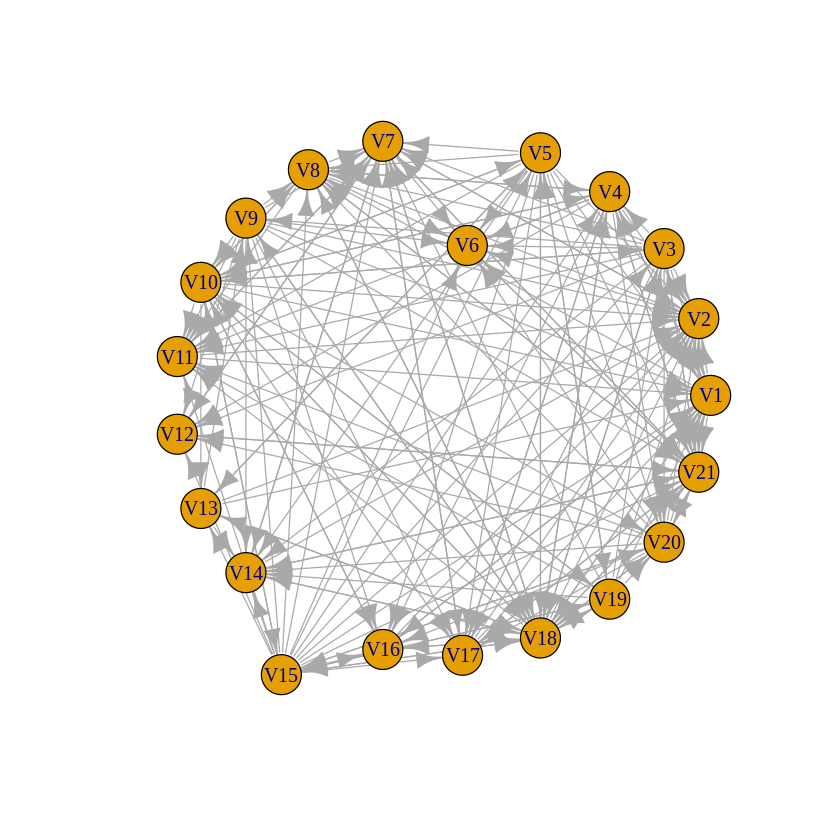

In [45]:
kk <- layout_with_kk(graph_krackhardt_advice)
plot(graph_krackhardt_advice, layout=kk)

In [46]:
# 12.6) Вывести «описательную сводку» сети.
network_krackhardt_advice

 Network attributes:
  vertices = 21 
  directed = TRUE 
  hyper = FALSE 
  loops = FALSE 
  multiple = FALSE 
  bipartite = FALSE 
  total edges= 190 
    missing edges= 0 
    non-missing edges= 190 

 Vertex attribute names: 
    vertex.names 

No edge attributes

In [47]:
# 12.7) Вычислить «пятичисловую сводку» сети:
#     Вычислить размер сети.
#     Вычислить плотность сети вручную и с помощью соответствующей функции.
#     Определить число компонент в сети по графику. Подтвердить свои догадки с помощью соответствующей функции.
#     Вычислить диаметр сети.
#     Вычислить коэффициент кластеризации.
cat("Размер: ", network.size(network_krackhardt_advice), "\n")
cat("Плотность: ", network.density(network_krackhardt_advice), "\n")
cat("Плотность вручную: ", ecount(graph_krackhardt_advice) / ( (factorial(vcount(graph_krackhardt_advice))) / factorial(vcount(graph_krackhardt_advice) - 2) ), "\n")
cat("Число компонент: ", count_components(graph_krackhardt_advice), "\n")
cat("Диаметр: ", diameter(graph_krackhardt_advice), "\n")
cat("Коэффициент кластеризации: ", transitivity(graph_krackhardt_advice, type = "undirected"), "\n")

Размер:  21 
Плотность:  0.452381 
Плотность вручную:  0.452381 
Число компонент:  1 
Диаметр:  3 
Коэффициент кластеризации:  0.7345088 


Выводы: 

Данная сеть обладает средней плотностью.

Данная сеть имеет 1 компоненту связности, это значит, что все акторы связаны между собой.

Диаметр данной сети равен 3, то есть наибольшая длина любого из кратчайших путей между всеми парами узлов равна 3.

Коэффицент кластеризации - степень взаимодействия между собой ближайших соседей узла, то есть вероятность того, что ближайшие соседи узла будут связаны не только с ним, но и между собой, равна 0.73

In [48]:
# 12.8) Вычислить среднюю степень узлов и дисперсию. Сделать выводы.
cat("В среднем акторы имеют 9 входящих и 9 исходящих связей\n")
cat("Однако, действительные значения могут отличаться от среднего, так как значение дисперсии достаточно большое.\n")
cat("Средняя степень узлов (in): ", mean(igraph::degree(graph_krackhardt_advice, mode = "in")), "\n")
cat("Средняя степень узлов (out): ", mean(igraph::degree(graph_krackhardt_advice, mode = "out")), "\n")
cat("Дисперсия (in): ", var(igraph::degree(graph_krackhardt_advice, mode = "in")), "\n")
cat("Дисперсия (out): ", var(igraph::degree(graph_krackhardt_advice, mode = "out")), "\n")

В среднем акторы имеют 9 входящих и 9 исходящих связей
Однако, действительные значения могут отличаться от среднего, так как значение дисперсии достаточно большое.
Средняя степень узлов (in):  9.047619 
Средняя степень узлов (out):  9.047619 
Дисперсия (in):  16.54762 
Дисперсия (out):  29.74762 


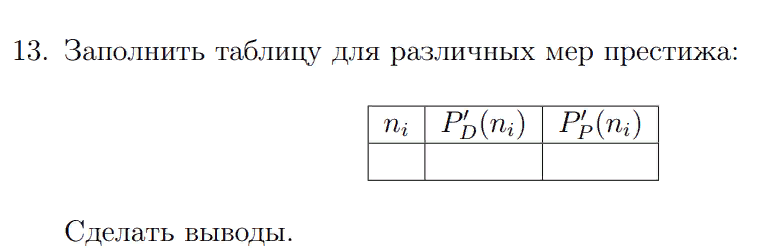

In [49]:
prestige_proximity <- sna::prestige(network_krackhardt_advice, cmode='domain.proximity', gmode='digraph', rescale = TRUE)
prestige_degree_norm <- sna::prestige(network_krackhardt_advice, cmode='indegree')/(network.size(network_krackhardt_advice)-1)
df_prestige <- data.frame(
    "n_i"=colnames(sociomatrix_krackhardt_advice),
    "degree_norm"=prestige_degree_norm,
    "proximity_norm"=prestige_proximity
)

cat("Разные меры отображают разную важность акторов.\nCамым важным актором по обоим мерам является актор под номером 2")
df_prestige

Разные меры отображают разную важность акторов.
Cамым важным актором по обоим мерам является актор под номером 2

n_i,degree_norm,proximity_norm
<chr>,<dbl>,<dbl>
V1,0.65,0.05051556
V2,0.90,0.06888485
V3,0.25,0.04209630
V4,0.40,0.04735834
V5,0.25,0.03788667
V6,0.50,0.05051556
V7,0.65,0.05612840
V8,0.50,0.05051556
V9,0.20,0.03696260


## Выводы

В ходе выполнения практической работы были проанализированы социальные сети с помощью возможностей языка R, а также библиотек. Овладели навыками работы с математическими пакетами для моделирования, получены навыки визуализации и анализа социальных сетей на языке R. Повторили теорию анализа социальных сетей. 

Были построены неориентированная ориентированная сети. Для каждой был проведен анализ, полученные результаты были отражены в отчете. Также изучены и использованы для построения обеих сетей алгоритмы укладки Фрюхтермана–Рейнгольда и Камада–Каваи.